In [11]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import config_91
import utils_91
import pickle
import torch

from sklearn.metrics import roc_curve, auc
from utils_91 import label_dict

clf_cfg = config_91.classifier_config

In [13]:
fold = '1.0'
PROBS_DIR = clf_cfg['VAL_PROBS_DIR']
LABELS_DIR = clf_cfg['VAL_LABELS_DIR']
with open(os.path.join(PROBS_DIR, f'{fold}.pkl'), 'rb') as handle:
    probs = pickle.load(handle)

with open(os.path.join(LABELS_DIR, f'{fold}.pkl'), 'rb') as handle:
    labels = pickle.load(handle)
    
preds = np.argmax(probs, axis=1)

In [14]:
preds[:10], labels[:10], preds.shape, labels.shape,

(array([57, 50, 24, 85, 50, 47, 88, 26, 82, 28], dtype=int64),
 array([57, 50, 24, 85, 50, 47, 88, 26, 82, 28], dtype=int64),
 (597,),
 (597,))

In [15]:
one_hot_labels = np.zeros((labels.size, labels.max()+1))
one_hot_preds = np.zeros((preds.size, labels.max()+1))
one_hot_labels[np.arange(labels.size), labels] = 1
one_hot_preds[np.arange(preds.size), preds] = 1
one_hot_labels.shape, one_hot_preds.shape, probs.shape

((597, 91), (597, 91), (597, 91))

In [16]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
thresholds = dict()
roc_auc = dict()
for i in range(clf_cfg['n_classes']):
    fpr[i], tpr[i], thresholds[i] = roc_curve(one_hot_labels[:, i], probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [17]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], thresholds["micro"] = roc_curve(one_hot_labels.ravel(),  probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

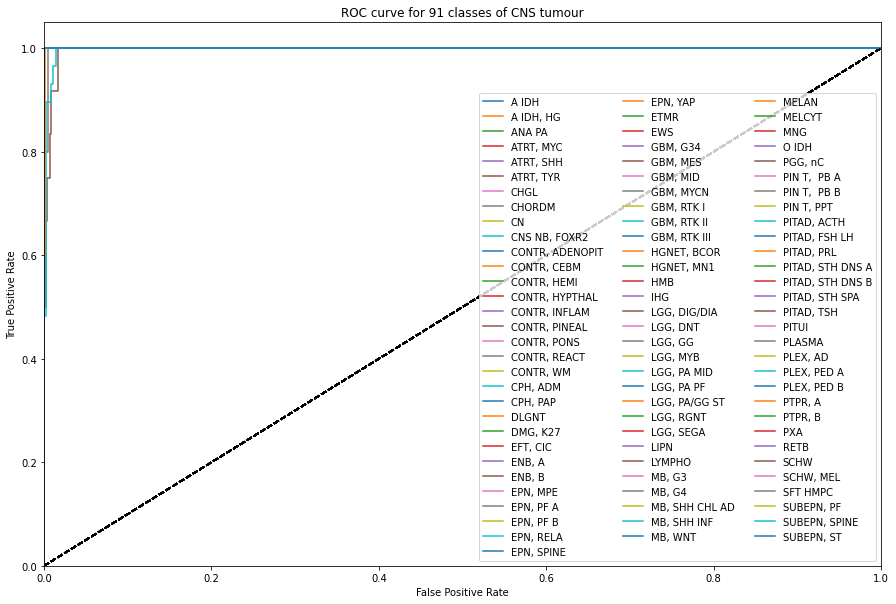

In [20]:
plt.rcParams['font.size'] = 10
plt.figure(figsize=(15, 10))
for i in range(clf_cfg['n_classes']):
    plt.plot(fpr[i], tpr[i], label=f'{list(label_dict.keys())[i]}, a = %0.3f' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for 91 classes of CNS tumour')
    plt.legend(loc="best", ncol=3)
plt.show()